<a href="https://colab.research.google.com/github/harikrish2727/cats-vs-dog-/blob/main/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
mydatapath = r"C:\Users\Vishnu\Desktop\cnn file\dataset"

In [ ]:
os.listdir(mydatapath)

['.ipynb_checkpoints',
 'cats_dogs.ipynb',
 'single_prediction',
 'test_set',
 'training_set',
 'Untitled.ipynb']

In [ ]:
test_path = mydatapath+"//test_set"

In [ ]:
train_path = mydatapath+"//training_set"

In [ ]:
sample_cat = test_path+"//cats//cat.4002.jpg"

In [ ]:
imread(sample_cat).shape

(499, 375, 3)

In [ ]:
imread(sample_cat).max()

216

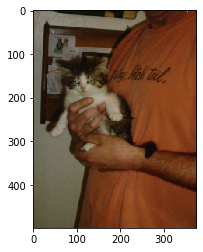

In [ ]:
plt.imshow(imread(sample_cat))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator(rotation_range=0,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.1,
                             fill_mode='nearest',
                             horizontal_flip=True,
                             rescale=1./255)

In [ ]:
train_gen = img_gen.flow_from_directory(train_path,
                                        batch_size=32,
                                        class_mode='binary',
                                        target_size=(128,128),
                                        color_mode="rgb")

Found 8000 images belonging to 2 classes.


In [ ]:
test_img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_gen = test_img_gen.flow_from_directory(test_path,
                                            shuffle=False,
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode="binary")

Found 1999 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=4,strides=2,input_shape=(128,128,3),activation="relu"))

In [ ]:
model.add(MaxPool2D(pool_size=3,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=5,strides=2,activation="relu"))
model.add(MaxPool2D(pool_size=3,strides=2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=128,activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(monitor="accuracy",patience=15)

In [ ]:
model.fit(x=train_gen,validation_data=test_gen,verbose=1,epochs=40,callbacks=early)

Epoch 1/40
250/250 [==============================] - 113s 451ms/step - loss: 0.6915 - accuracy: 0.5311 - val_loss: 0.6862 - val_accuracy: 0.5498
Epoch 2/40
250/250 [==============================] - 83s 330ms/step - loss: 0.6783 - accuracy: 0.5694 - val_loss: 0.6354 - val_accuracy: 0.6318
Epoch 3/40
250/250 [==============================] - 83s 333ms/step - loss: 0.6426 - accuracy: 0.6347 - val_loss: 0.5846 - val_accuracy: 0.7189
Epoch 4/40
250/250 [==============================] - 77s 307ms/step - loss: 0.6244 - accuracy: 0.6533 - val_loss: 0.5910 - val_accuracy: 0.6853
Epoch 5/40
250/250 [==============================] - 74s 297ms/step - loss: 0.6108 - accuracy: 0.6626 - val_loss: 0.5578 - val_accuracy: 0.7199
Epoch 6/40
250/250 [==============================] - 72s 289ms/step - loss: 0.5979 - accuracy: 0.6816 - val_loss: 0.6141 - val_accuracy: 0.6683
Epoch 7/40
250/250 [==============================] - 71s 286ms/step - loss: 0.5865 - accuracy: 0.6907 - val_loss: 0.5701 - val_a

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
test = mydatapath+"//single_prediction"

In [ ]:
os.listdir(test)[5]

'dog.4047.jpg'

In [ ]:
testimage = image.load_img(test+"//dog.4047.jpg",target_size=(128,128))
testimage_array = image.img_to_array(testimage)
testimage_resized = testimage_array/255
test_image = np.expand_dims(testimage_resized,axis=0)

In [ ]:
test_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
model.predict_classes(test_image)

array([[1]])

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("catsdogs.h5")